In [3]:
import pandas as pd
df= pd.read_csv("sales_data_sample.csv")
df.head()
print(df.describe())
cdf=df.dropna()
cdf.info()
cdf['ORDERDATE']= pd.to_datetime(cdf['ORDERDATE'])

        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25% 

In [4]:
#total sales
total_sales=cdf['SALES'].sum()
print(total_sales)

506562.52


In [5]:
#Average Order Value (AOV)
Aov=cdf.groupby('ORDERNUMBER')['SALES'].sum().mean()
print(Aov)

38966.347692307696


In [6]:
top_product=cdf.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False)
print(top_product)

PRODUCTCODE
S18_2795     19255.22
S10_4698     19038.89
S12_1666     18616.09
S18_2949     14791.60
S18_4600     12936.10
               ...   
S72_1253      2189.60
S24_2972      1575.60
S700_2047     1089.36
S32_2206      1035.58
S24_3969       652.35
Name: SALES, Length: 76, dtype: float64


ORDERDATE
2003-04    50397.66
2003-05     9738.18
2003-07    28397.26
2003-09    47191.76
2003-11    41791.95
2004-02    49637.57
2004-07    41297.14
2004-11    91222.00
2004-12    37905.15
2005-01    29852.17
2005-03    35160.25
2005-05    43971.43
Freq: M, Name: SALES, dtype: float64


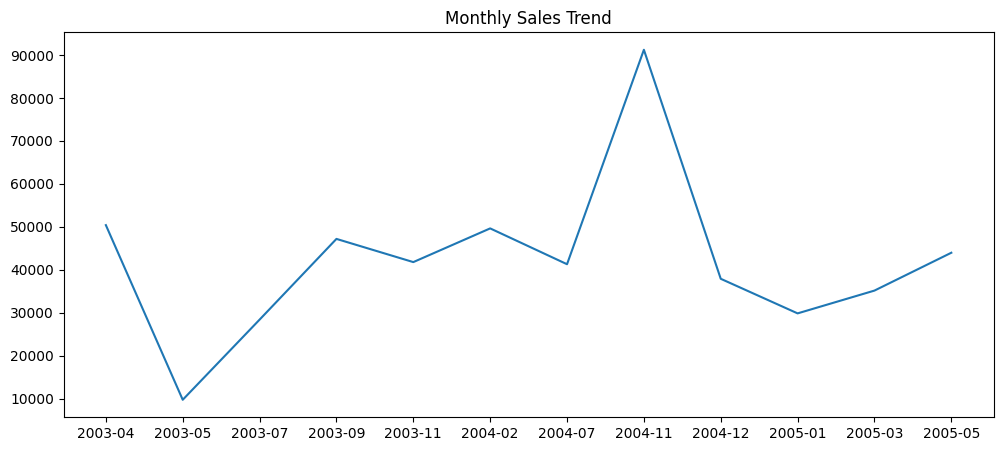

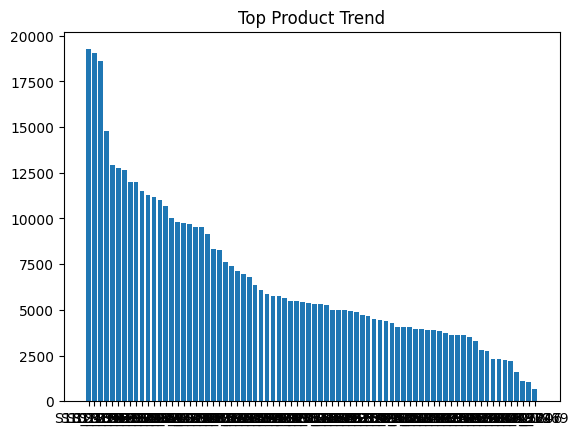

In [7]:
import matplotlib.pyplot as plt
monthly_sales= cdf.groupby(cdf['ORDERDATE'].dt.to_period('M'))['SALES'].sum()
print(monthly_sales)
plt.figure(figsize = (12,5))
plt.plot( monthly_sales.index.astype(str),monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.show()

plt.bar(top_product.index,top_product.values)
plt.title('Top Product Trend')
plt.show()

In [8]:
top_country=cdf.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print(top_country)

COUNTRY
Australia    506562.52
Name: SALES, dtype: float64


In [9]:
cdf.to_csv('cleaned_sales_data.csv')